# Feature Extraction, NLP and LogRegression: OKCupid Profiles

## Introduction:
This project analyzes data from the online dating application, OKCupid, that is a summary of profile information from users in the San Francisco Bay Area. The goal is to scope, prep, analyze/extract features and create a logistic regression model to answer a question:
Can you predict if someone works in a STEM (Science, Technology, Engineering and Math) profession based on their user profile data?

**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scope:
### Project Goal
The goal is to use exploratory data analysis to identify potential features of OKCupid profiles that may help predict whether or not an individual works in the STEM field. I will then use these features to build and evaluate a logistic regression model. This will demonstrate and exercise skills in data cleaning, feature extraction, natural language processing and model evaluation.
### Data
The project has one data set provided by Codecademy called profiles.csv. In the data, each row represents an OkCupid user and the columns are the responses to their user profile questions, which include multiple-choice and short answer questions. It consists of a mixture of numerical, categorical and free-text variables.
### Analysis
I will use descriptive statistics, data visualization, and natural language processing to find the key features that will most likely provide significant predictive power for the logistic regression model. Subsets of numerical, categorical and NLP derived features will be used to compare against and improve baseline model performance.
### Evaluation
Model performance will be initially evaluated based on Area Under the Receiver Operating Characteristic Curve (ROC AUC). The final model will also be evaluated based on accuracy score and confusion matrix statistics with a discussion on how to select a threshold based on profit-matrix values.

## Load General Libraries and Data:

In [1]:
## General libraries
import numpy as np
import pandas as pd

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load profile data
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
#print(profiles.head())
print(profiles.shape)
#print(profiles.dtypes)

profiles.info()

(59946, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64

In [3]:
# print value counts for each of the categorical variables
print(profiles.body_type.value_counts())
print(profiles.diet.value_counts())
print(profiles.drinks.value_counts())
print(profiles.drugs.value_counts())
print(profiles.education.value_counts())
print(profiles.ethnicity.value_counts())
print(profiles.job.value_counts())
print(profiles.offspring.value_counts())
print(profiles.orientation.value_counts())
print(profiles.pets.value_counts())
print(profiles.religion.value_counts())
print(profiles.sex.value_counts())
print(profiles.sign.value_counts())
print(profiles.smokes.value_counts())
print(profiles.speaks.value_counts())
print(profiles.status.value_counts())
print(profiles.last_online.value_counts())

# print descriptive stats for numeric variables
print(profiles.describe())

# replace income values that are -1 to None.
profiles.income = profiles.income.replace({-1: None})

# helper method to quantify percentage of missingness
def percent_missing(df):
    print((100*df.isna().sum().sort_values(ascending=False)/len(df)).round(2))
    
# show missing percents    
percent_missing(profiles)    

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: dri

income         80.81
offspring      59.32
diet           40.69
religion       33.74
pets           33.23
essay8         32.07
drugs          23.49
essay6         22.97
essay9         21.02
essay7         20.77
essay3         19.14
sign           18.44
essay5         18.10
essay4         17.58
essay2         16.08
job            13.68
essay1         12.63
education      11.06
ethnicity       9.48
smokes          9.19
essay0          9.15
body_type       8.83
drinks          4.98
speaks          0.08
height          0.01
sex             0.00
age             0.00
orientation     0.00
location        0.00
last_online     0.00
status          0.00
dtype: float64


## Data Summary:
Profiles consists of 31 columns and 59449 rows. Column content and missingness are discussed below.
**The columns in the dataset include:**
- age: continuous variable of age of user
- body_type: nominal variable of body type of user (12 categories)
- diet: nominal variable of dietary information (5 main categories with strictly and mostly modifiers)
- drinks: ordinal variable of alcohol consumption (not at all - desperately)
- drugs: ordinal variable of drug usage (never - often)
- education: ordinal variable of educational attainment; will transform to (drop out of highschool - graduate degree+)
- ethnicity: nominal variable of ethnic backgrounds (217 combinations)
- height: continuous variable of height of user
- income: continuous variable of income of user
- job: nominal variable of employment description (will convert to binary target, STEM = 1 and Other = 0)
- offspring: nominal variable of children status. Describes current count (0, 1, 2+) and desire for more children.
- orientation: nominal variable of sexual orientation (straight, bi, gay)
- pets: nominal variable of pet ownership/preferences for dogs and cats
- religion: nominal variable with ordinal modifier of religious background (8 main categories, laughing about it - very serious)
- sex: nominal variable of gender (m or f)
- sign: nominal variable of astrological symbol with ordinal modifier (12 categories, it doesn't matter - it matters a lot)
- smokes: ordinal variable of smoking consumption (5 categories, no - yes)
- speaks: nominal variable of language(s) spoken with fluency modifier (7647 unique combinations)
- status: nominal variable of relationship status (5 categories)
- last_online: date variable of last login (YYYY-MM-DD-HH-MM); not useful for prediction, but data is circa mid-2012.
- location: categorical variable of user locations (199 unique city, state)

**And a set of open short-answer responses to :**
- essay0: My self summary
- essay1: What I’m doing with my life
- essay2: I’m really good at
- essay3: The first thing people usually notice about me
- essay4: Favorite books, movies, show, music, and food
- essay5: The six things I could never do without
- essay6: I spend a lot of time thinking about
- essay7: On a typical Friday night I am
- essay8: The most private thing I am willing to admit
- essay9: You should message me if…

**Percent of Missingness by Column:**
    
     income      80.81
     offspring   59.32
     diet        40.69
     religion    33.74
     pets        33.23
     essay8      32.07
     drugs       23.49
     essay6      22.97
     essay9      21.02
     essay7      20.77
     essay3      19.14
     sign        18.44
     essay5      18.10
     essay4      17.58
     essay2      16.08
     job         13.68
     essay1      12.63
     education   11.06
     ethnicity   9.48
     smokes      9.19
     essay0      9.15
     body_type   8.83
     drinks      4.98
     speaks      0.08
     height      0.01
     sex         0.00
     age         0.00
     orientation 0.00
     location    0.00
     last_online 0.00
     status      0.00
     
## Data Exploration, Transformation and Feature Extraction:
### Creating the Target
All rows with a null value for 'job' were dropped leaving 51,748 total. A new column was created to represent the target variable for STEM jobs. Any users that answered 'science / tech / engineering', 'computer / hardware / software', or 'medicine / health' were considered to work in the STEM field. The target class represents ~25.6% of the sample, which means it is moderately imbalanced. If I downsample the non-STEM examples, there will be a loss of data about non-STEM users that could potentially hurt the model performance. Conversely, oversampling the minority can lead to overfitting and poor future performance of the model. During model training, various techniques for oversampling the miniority class (SMOTE, BorderlineSMOTE, SMOTEN) and undersampling (RandomUnderSampling) the majority class will be empirically evaluated.

In [4]:
# drop any rows with null values for job
profiles = profiles[profiles['job'].notna()].reset_index()

# check new length of dataframe (OUTPUT: 51748)
print(len(profiles))

# create a list of values for STEM field jobs
STEM_list = ['science / tech / engineering', 'computer / hardware / software', 'medicine / health']

# create new column 'STEM' to hold binary target variable. 1 = STEM field job
profiles['STEM'] = profiles.apply(lambda row: 1 if row['job'] in STEM_list else 0, axis=1)

# check for target class balance
print(profiles.STEM.sum()/len(profiles))
# target is about 25.6%, which is moderately imbalanced. Consider resampling STEM jobs or downsampling non-STEM

51748
0.25579732550050244


### Cleaning and Prepping for Analysis
- age: no treatment
- body_type: fillna with 'unknown'
- body_image: new ordinal column scaled 0-4 based on positivity of body_type description; null will be a neutral 2

In [5]:
# body_type fillna() with unknown
profiles.body_type = profiles.body_type.fillna('unknown')

# helper method to assign body_image based on body_type
def get_body_image(body_type):
    
    if body_type == 'overweight' or body_type == 'used up':
        return 0
    elif body_type == 'skinny' or body_type == 'a little extra':
        return 1
    elif body_type == 'thin' or body_type == 'full figured':
        return 3
    elif body_type == 'fit' or body_type == 'athletic' or body_type == 'jacked' or body_type == 'curvy':
        return 4
    else:
        return 2

# create body_image column
profiles['body_image'] = profiles.apply(lambda row: get_body_image(row['body_type']), axis=1)

- diet: convert to just the five main categories and fillna with 'unknown'
- diet_modifier: new ordinal column (0= no modifier, 1 = mostly, 2= strictly)

In [6]:
# diet fillna() with unknown
profiles.diet = profiles.diet.fillna('unknown')

# helper method to create a tuple from the diet category and modifier of 'mostly' or 'strictly'
def get_diet_mod(diet_str):
    mod_map = {'mostly': 1,
               'strictly': 2}
    
    if ' ' not in diet_str:
        diet_mod = (diet_str, 0)
    else:
        modifier = diet_str.split(' ', 1)[0]
        diet = diet_str.split(' ', 1)[1]
        mod = mod_map[modifier]
        diet_mod = (diet, mod)
    
    return diet_mod

# create diet_modifier column
profiles['diet_modifier'] = profiles.apply(lambda row: get_diet_mod(row['diet'])[1], axis=1)

# convert diet to just main categories
profiles['diet'] = profiles.apply(lambda row: get_diet_mod(row['diet'])[0], axis=1)

- drinks: fillna with 'unknown'
- drugs: fillna with 'unknown'

In [7]:
# drinks fillna() with unknown
profiles.drinks = profiles.drinks.fillna('unknown')

# drugs fillna() with unknown
profiles.drugs = profiles.drugs.fillna('unknown')

- education: fillna with 'unknown'
- education_level: ordinal (drop out of highschool - graduated with doctorate)

In [8]:
# education fillna() with unknown
profiles.education = profiles.education.fillna('unknown')

# helper method to retrieve ecucation_level from education
def get_ed_level(edu_str):
    ed_level = 0
    
    # 5 if in ph.d or med school
    if 'ph.d' in edu_str:
        ed_level = 5
    elif 'med' in edu_str:
        ed_level = 5
    # 5 if masters and graduated, else 4     
    elif 'masters' in edu_str:
        if 'graduated' in edu_str:
            ed_level = 5
        else:
            ed_level = 4
    # 5 if law and graduated, else 4     
    elif 'law' in edu_str:
        if 'graduated' in edu_str:
            ed_level = 5
        else:
            ed_level = 4
    # 4 if university and graduated, else 3        
    elif 'university' in edu_str:
        if 'graduated' in edu_str:
            ed_level = 4
        else:
            ed_level = 3    
    # 3 if two-year and graduated, else 2        
    elif 'two-year' in edu_str:
        if 'graduated' in edu_str:
            ed_level = 3
        else:
            ed_level = 2
    # 2 if high school and graduated, else 1        
    elif 'high school' in edu_str:
        if 'graduated' in edu_str:
            ed_level = 2
        else:
            ed_level = 1
    
    return ed_level

# create education_level column
profiles['education_level'] = profiles.apply(lambda row: get_ed_level(row['education']), axis=1)

- ethnicity: fillna with 'unknown'; create categories based on those in data: 'white', 'black', 'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian', 'asian', 'other', '2 or more', 'unknown'

In [9]:
# ethnicity fillna() with unknown
profiles.ethnicity = profiles.ethnicity.fillna('unknown')

# map major categories to themselves and all others which contain various combinations will become null
profiles.ethnicity = profiles.ethnicity.map({'white': 'white', 'black': 'black',\
                                             'hispanic / latin': 'hispanic / latin',\
                                             'pacific islander': 'pacific islander',\
                                             'native american': 'native american',\
                                             'middle eastern': 'middle eastern',\
                                             'indian': 'indian', 'asian': 'asian',\
                                             'other': 'other', 'unknown': 'unknown'})

# now use fillna() with '2 or more'
profiles.ethnicity = profiles.ethnicity.fillna('2 or more')

- height: drop the single na row 
- income: drop column from dataframe because >80% of users did not fill out the income
- job: drop column from table because the target variable is directly derived from it

In [10]:
# drop the single row where height is null 
profiles = profiles[profiles['height'].notna()].reset_index()

# drop the income and jobs columns
profiles.drop(['income', 'job'], inplace= True, axis=1)

- offspring: change to 0 for none or unknown, 1 for one child, 2 for 2+ children
- more_children: new ordinal, 2 if wants more kids, 1 if might want more, 0 if doesn't want more
- orientation: no treatment

In [11]:
# offspring fillna() with unknown
profiles.offspring = profiles.offspring.fillna('unknown')

# helper method to get preference for more children
def get_more_children_preference(child_str):
    preference = 0
    
    if 'wants' in child_str:
        preference = 2
    elif 'might want' in child_str:
        preference = 1
        
    return preference

# make more_children column
profiles['more_children'] = profiles.apply(lambda row: get_more_children_preference(row['offspring']), axis=1)

# helper method to count number of children
def get_child_count(child_str):
    count = 0
    
    if 'has kids' in child_str:
        count = 2
    elif 'has a kid' in child_str:
        count = 1
    
    return count
# convert offspring column to ordinal for children count
profiles['offspring'] = profiles.apply(lambda row: get_child_count(row['offspring']), axis=1)

- pets: split into four boolean columns: has_dog, has_cat, wants_dog, wants_cat; unknowns will all be 0; drop pets column

In [12]:
# pets fillna() with unknown
profiles.pets = profiles.pets.fillna('unknown')

# helper method for extracting dog preference
def get_likes_dogs(pet_str):
    
    if 'dislikes dogs' in pet_str:
        return 0
    elif 'dogs' in pet_str:
        return 1
    else:
        return 0

# create boolean column for likes_dogs    
profiles['likes_dogs'] = profiles.apply(lambda row: get_likes_dogs(row['pets']), axis=1)

# helper method for extracting cat preference
def get_likes_cats(pet_str):
    
    if 'dislikes cats' in pet_str:
        return 0
    elif 'cats' in pet_str:
        return 1
    else:
        return 0

# create boolean column for likes_cats     
profiles['likes_cats'] = profiles.apply(lambda row: get_likes_cats(row['pets']), axis=1)    

# helper method for extracting dog ownership
def get_has_dogs(pet_str):
    
    if 'has dogs' in pet_str:
        return 1
    else:
        return 0

# create boolean column for has_dogs 
profiles['has_dogs'] = profiles.apply(lambda row: get_has_dogs(row['pets']), axis=1)      

# helper method for extracting cat ownership
def get_has_cats(pet_str):
    
    if 'has cats' in pet_str:
        return 1
    else:
        return 0

# create boolean column for has_cats     
profiles['has_cats'] = profiles.apply(lambda row: get_has_cats(row['pets']), axis=1) 

# drop the pets column
profiles.drop(['pets'], inplace= True, axis=1)

- religion: nominal variable with ordinal modifier of religious background (8 main categories, laughing about it - very serious)
- sex: no treatment

In [13]:
# religion fillna() with unknown
profiles.religion = profiles.religion.fillna('unknown')

# helper method to extract religion modifier score
def get_religion_mod(rel_str):
    
    if 'unknown' in rel_str:
        mod = 0
    elif 'laughing' in rel_str:
        mod = 0
    elif 'too' in rel_str:
        mod = 1
    elif 'somewhat' in rel_str:
        mod = 3
    elif 'very' in rel_str:
        mod = 4
    else:
        mod = 2
    
    return mod

# create religion_mod column, 0:unknown or laughing, 1:not too serious, 2:No modifier, 3:somewhat serious, 4:very serious
profiles['religion_mod'] = profiles.apply(lambda row: get_religion_mod(row['religion']), axis=1) 

# helper method to extract just the religion
def get_religion(rel_str):
    return rel_str.split(' ', 1)[0]

# convert religion column to religion only
profiles['religion'] = profiles.apply(lambda row: get_religion(row['religion']), axis=1)

- sign: fillna with 'unknown'. Convert to 12 main categories and unknown.
- sign_mod: new ordinal for sentiment towards astrological signs

In [14]:
# sign fillna() with unknown
profiles.sign = profiles.sign.fillna('unknown')

# helper to extract astrological sign sentiments
def get_sign_mod(sign_str):
    
    if 'unknown' in sign_str:
        mod = 0
    elif 'doesn' in sign_str:
        mod = 0
    elif 'fun' in sign_str:
        mod = 2
    elif 'a lot' in sign_str:
        mod = 3
    else:
        mod = 1
    
    return mod

# create sign_mod column. 0:unknown or doesn't matter, 1:no modifier, 2:fun to think about, 3:it matters a lot
profiles['sign_mod'] = profiles.apply(lambda row: get_sign_mod(row['sign']), axis=1) 

# helper method to extract just the sign
def get_sign(rel_str):
    return rel_str.split(' ', 1)[0]

# convert sign column to religion only
profiles['sign'] = profiles.apply(lambda row: get_sign(row['sign']), axis=1)

- smokes: fillna with 'unknown'

In [15]:
# smokes fillna() with unknown
profiles.smokes = profiles.smokes.fillna('unknown')

- speaks: fillna() with unknown; create columns for each of the languages spoken with ordinal variables based on fluency, 0:does not speak, 1:speaks poorly, 2:speaks okay, 3:speaks fluently or did not describe fluency
- language_count: new column that shows number of languages spoken (regardless of fluency)

In [16]:
#speaks fillna() with unknown
profiles.speaks = profiles.speaks.fillna('unknown')

# import the count vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# use CountVectorizer to create a vocabulary list of words in profiles.speaks
text = profiles.speaks
cv = CountVectorizer()
cv.fit_transform(text)

# print out the words in the vocabulary of the CountVectorizer
print(cv.vocabulary_.keys())

# use vocab keys to build a comprehensive list of languages spoken
# c++, sign language and fluency descriptors were removed
lang_list = ['english', 'spanish', 'french', 'german', 
             'chinese', 'italian', 'tagalog', 'japanese', 
             'other', 'thai', 'russian', 'dutch', 'lisp', 
             'indonesian', 'portuguese', 'belarusan', 
             'gujarati', 'farsi', 'hindi', 'sanskrit', 
             'afrikaans', 'khmer', 'hebrew', 'yiddish', 
             'polish', 'korean', 'persian', 'czech', 
             'croatian', 'bengali', 'vietnamese', 
             'esperanto', 'swahili', 'latin', 'swedish', 
             'norwegian', 'greek', 'albanian', 'icelandic', 
             'arabic', 'tibetan', 'cebuano', 'georgian', 
             'hawaiian', 'turkish', 'latvian', 'serbian', 
             'tamil', 'ukrainian', 'occitan', 'breton', 
             'catalan', 'urdu', 'hungarian', 'irish', 
             'romanian', 'finnish', 'bulgarian', 
             'welsh', 'danish', 'estonian', 'lithuanian', 
             'malay', 'ilongo', 'maori', 'frisian', 'chechen', 
             'slovenian', 'basque', 'mongolian', 'slovak', 
             'armenian', 'rotuman', 'sardinian']

# helper method to get a user's languages fluency given a language and the 'speaks' column string
def get_lang_fluency(lang, lang_str):
    if lang not in lang_str:
        return 0
    elif lang + ' (poorly)' in lang_str:
        return 1
    elif lang + ' (okay)' in lang_str:
        return 2
    else:
        return 3
    
# loop through languages list and create a new column for fluency in that language
for lang in lang_list:
    profiles[lang] = profiles.apply(lambda row: get_lang_fluency(lang, row['speaks']), axis=1)

# add columns for sign_language and C_plus_plus
profiles['sign_language'] = profiles.apply(lambda row: get_lang_fluency('sign language', row['speaks']), axis=1)
profiles['C_plus_plus'] = profiles.apply(lambda row: get_lang_fluency('c++', row['speaks']), axis=1)

# count commas in each row of profiles.speaks and add 1. this is the number of languages spoken
# store this count in a new column, language_count
profiles['language_count'] = profiles.apply(lambda row: row['speaks'].count(',') + 1, axis=1)

dict_keys(['english', 'fluently', 'spanish', 'poorly', 'french', 'german', 'chinese', 'okay', 'sign', 'language', 'italian', 'tagalog', 'japanese', 'other', 'thai', 'russian', 'dutch', 'lisp', 'indonesian', 'portuguese', 'belarusan', 'gujarati', 'farsi', 'hindi', 'sanskrit', 'afrikaans', 'khmer', 'hebrew', 'yiddish', 'polish', 'korean', 'persian', 'czech', 'croatian', 'bengali', 'vietnamese', 'esperanto', 'swahili', 'latin', 'swedish', 'norwegian', 'greek', 'ancient', 'albanian', 'icelandic', 'arabic', 'tibetan', 'cebuano', 'georgian', 'hawaiian', 'turkish', 'latvian', 'serbian', 'tamil', 'ukrainian', 'occitan', 'breton', 'catalan', 'urdu', 'hungarian', 'irish', 'unknown', 'romanian', 'finnish', 'bulgarian', 'welsh', 'danish', 'estonian', 'lithuanian', 'malay', 'ilongo', 'maori', 'frisian', 'chechen', 'slovenian', 'basque', 'mongolian', 'slovak', 'armenian', 'rotuman', 'sardinian'])


- status: no treatment
- last_online: no treatment
- location: using a cutoff of 100 users, create dummy variables for each city

In [17]:
# the top 41 value_counts() in profiles all have at least 100 users
# store these in a list, city_list
city_list = profiles.location.value_counts()[0:41].index.tolist()

# helper method that checks for location in city_list
# if it is there, returns just the city by splitting on the ',' in the string
# else, it returns 'other'
def truncate_location(loc_str):
    if loc_str in city_list:
        return loc_str.split(',', 1)[0]
    else:
        return 'other'

# create new column 'city' that is truncated locations
profiles['city'] = profiles.apply(lambda row: truncate_location(row['location']), axis=1)

## Natural Language Processing:
### Preprocessing Text
1. Import libraries from nltk, the Natural Language Toolkit.
2. Collect document column names into a list.
3. Replace null documents with empty strings.
4. Convert text to lowercase and remove punctuation. 
5. Combine all text columns into one column, the corpus with each row representing a document.

At this point the number of unique words in the corpus was exceptionally large, 148,517 as seen with value_counts(). The more common a word in the corpus, the less predictive power it will have. Also, if it is too rare, the word will not be prevalent enough to train the model. A threshold of at least 50 occurrences in the corpus was chosen as a minimum. Additionally, the 100 most common words were eliminated as stop words. This reduced the corpus vocabulary to 13,507 words, which is much more manageable. To save on processing time, a whitelist of the 13,507 word vocabulary was used. A stop_word list was ten times as long and would have taken roughly ten times the processing time. 

6. Remove common and rare words.
7. Split document into word tokens.
8. Lemmatize word tokens by converting words to their common root. Most accurate when done with the words part of speech. An example: 'are', 'is' and 'will' become 'be' after lemmatization. This helps reduce the overall vocabulary size.

**Note:** Steps 4 and 6-8 could have been handled by CountVectorizer() with default/custom settings for stop_words and lemmatization with a smaller collection of data. With one this size, I received a memory usage error.


In [18]:
# load libraries for NLP
import nltk, re
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

# create list of essay columns
essays = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4',\
          'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

# fill in null essays with empty strings
profiles[essays] = profiles[essays].replace(np.nan, '', regex= True)

# convert all text to lowercase, remove punctuation
for essay in essays:
    profiles[essay] = profiles[essay].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    profiles[essay] = profiles[essay].str.replace('[^\w\s]',' ', regex=True)

# combine all essay column text in a new column 'all_essays'
profiles['all_essays'] = profiles[essays].apply(lambda x: ' '.join(x), axis= 1)

# find somewhat common words (occurence rate of >50, but not the 100 most common in corpus)
white_list_words = pd.Series(' '.join(profiles['all_essays'])\
                       .split()).value_counts()[100:]\
                        .loc[lambda x: x > 50].index.tolist()

# this step is resource intensive. checks each word in all_essays against the whitelist of 13507.
# a stopword list with the 100 most frequent and the words with term frequencies < 50 was 135010 terms long.
# in this case, checking against a white list is 10x faster
profiles['all_essays'] = profiles['all_essays'].apply(lambda x: ' '.join(x for x in x.split() if x in white_list_words))

# create a lemmatizer object
normalizer = WordNetLemmatizer()

# helper method to retrieve most likely part of speech for a word
def get_part_of_speech(word):
    # retrieve parts of speech from wordnet.synsets()
    probable_part_of_speech = wordnet.synsets(word)
    
    # create counter object
    pos_counts = Counter()
    
    # count parts of speech
    pos_counts['n'] = len([item for item in probable_part_of_speech if item.pos()=='n'])
    pos_counts['v'] = len([item for item in probable_part_of_speech if item.pos()=='v'])
    pos_counts['a'] = len([item for item in probable_part_of_speech if item.pos()=='a'])
    pos_counts['r'] = len([item for item in probable_part_of_speech if item.pos()=='r'])
    
    # assign part of speech to the most common
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    
    return most_likely_part_of_speech

# helper method to preprocess text and return a lemmatized list of words
def preprocess_text(text):
    # remove non-word characters and spaces, convert to lower-case
    cleaned = re.sub(r'\W+', ' ', text).lower()
    # create a tokenized list of words
    tokenized = word_tokenize(text)
    # lemmatize tokenized list with the part of speech fed to the lemmatizer
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    
    return normalized

# tokenize and lemmatize the words in all_essays
profiles['all_essays'] = profiles.apply(lambda row: preprocess_text(row['all_essays']), axis= 1)


### Extracting Keywords by Odds-Ratios Adjusted for False Discovery Rate Between STEM and nonSTEM Profiles

The goal of this processing is to extract keywords that are particularly associated with one class over another using an odds-ratio. If the words are equally associated with each class the ratio is one. The higher above one, the more closely it is associated with STEM words. The closer the ratio gets to 0, the more it is associated with nonSTEM profiles.

1. The profiles are divided based on the target variable.
2. The CountVectorizer is used in binary mode to return if a vocabulary word is found in a user's combined essays document.
3. This information is stored in a dataframe by each class.
4. The binary row for each word is summed for the class. This equates to the number of profiles where that word occurs.
5. The number from step 4 is subtracted from the total number of class profiles. This is the number of profiles that did not have that word.
6. The dataframes for each class are combined using an inner join on the indexes (words).
7. Between class odds-ratios and p-values for each word are computed with Fisher's exact test method from Scipy.stats.
8. Because this is a test run thousands of times, there is a large risk of false-positives accumulating. To counteract a high false-positive rate, Benjamani-Hochberg correction for p-values was applied.
9. A cutoff of a corrected p-value less than 1.0 x 10^-6 and an odds ratio greater than 2 or less than 0.5 was chosen to limit the keyword selection.

**Interpretation:** Words where the interclass odds-ratio is greater than 2 indicate these words are at least twice as likely to occur in a STEM profile. Words where the interclass odds-ratio is less than 0.5 are twice as likely to occur in a non-STEM profile. A corrected p-value less than 1.0 x 10^-6 means that the probability of these odds-ratios occuring by chance alone are less than one in a million.

**This 2x odds-ratio cutoff yielded 119 terms found in the lists below:**

    103 STEM words:
     
    '_blank',        'algorithm',      'alto',         'anathem',         'android',  
    'application',   'apps',           'artificial',   'asimov',          'bicycling', 
    'biomedical',    'biotech',        'bt',           'canada',          'clinic', 
    'clinical',      'cod',            'code',         'commute',         'computer', 
    'computing',     'coworkers',      'crossfit',     'cryptonomicon',   'data', 
    'database',      'developer',      'dna',          'electrical',      'electronics', 
    'emergency',     'ender',          'engineer',     'engineering',     'escher', 
    'feynman',       'fm',             'freakonomics', 'gadget',          'gattaca', 
    'geeky',         'gibson',         'hack',         'hacker',          'hardware', 
    'healthcare',    'heinlein',       'hospital',     'intp',            'javascript', 
    'lab',           'laser',          'linux',        'mechanical',      'medical', 
    'mit',           'mobile',         'molecular',    'neal',            'neuromancer', 
    'neuroscience',  'nofollow',       'nurse',        'orbital',         'palo', 
    'pediatric',     'pharmaceutical', 'physician',    'practitioner',    'pratchett',
    'primer',        'programmer',     'programming',  'psychotherapist', 'register',
    'rel',           'researcher',     'residency',    'rn',              'scientific',
    'scientist',     'scifi',          'silicon',      'software',        'solar', 
    'soma',          'startup',        'stephenson',   'stross',          'tech', 
    'techie',        'technical',      'technician',   'technology',      'therapist', 
    'tinker',        'ucsf',           'ui',           'vernor',          'vinge', 
    'web',           'wikipedia',      'xkcd'
        
It appears to be a success. STEM words are associated with STEM professions, like 'rn' for Registered Nurse or 'developer'. They also play to popculture stereotypes. For example, STEM users talk about Neal Stephenson's books "Anathem" and "Cryptonomicon" and Sci-Fi authors Vernor Vinge and Charles Stross. They also mention noted physicist Richard Feynman and my personal favorite science themed webcomic, 'XKCD'. For exercise, they seem to enjoy 'bicycling' and 'crossfit'. 

    16 non-STEM words:
     
    'accounting',    'attorney',       'ba',           'credential', 
    'educator',      'elementary',     'homework',     'lawyer', 
    'mfa',           'nanny',          'retail',       'semester', 
    'sfsu',          'student',        'stylist',      'teacher'
    


Many nonSTEM profiles refer to nonSTEM professions, like 'attorney', 'accounting', 'nanny' and 'hairstylist'. They also refer to Arts education majors like 'BA' and 'MFA'. They also might still be a 'student' at 'SFSU'. 

Keywords associated with pop-culture will shift in prevalence with the changing popularity of topics in the populace. So while they are a good indicator for this data and time period, they will need to be reupdated if the model is to be used over time. The profession associated words will likely remain a more stable predictor in the long run.  

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# create subset of only STEM profiles and a document collection of only STEM profile essays
STEM_data = profiles[profiles['STEM'] == 1]
STEM_text_data = STEM_data['all_essays']

# store number of STEM profiles for future calculations
num_STEM = len(STEM_data)
# create column headers for a dataframe to hold STEM profile binary-word counts. P=positive target class.
STEM_profiles = [f"P {i+1}" for i in range(num_STEM)]

# create a CountVectorizer object in binary mode. Fit_transform on STEM_text_data
vectorizer = CountVectorizer(binary=True)
STEM_vectors = vectorizer.fit_transform(STEM_text_data)

# get the feature_names to act as row indexes in STEM_counts dataframe
feature_names = vectorizer.get_feature_names()

# transform the sparse matrix result from the CountVectorizer into a dataframe. 
# Rows= words, Columns= each profile, Values= binary for each term
STEM_counts = pd.DataFrame(STEM_vectors.T.todense(), index=feature_names, columns=STEM_profiles) 

In [20]:
# create STEM_sum_pos column that is the number of STEM profiles that used a word
STEM_counts['STEM_sum_pos'] = STEM_counts.apply(lambda x: np.sum(x[STEM_profiles]), axis=1)

# create STEM_sum_neg column that is the number of STEM profiles that did not use a word
STEM_counts['STEM_sum_neg'] = num_STEM - STEM_counts['STEM_sum_pos']

# create nonSTEM subset and document collection
nonSTEM_data = profiles[profiles['STEM'] == 0]
nonSTEM_text_data = nonSTEM_data['all_essays']

# store number of nonSTEM profiles for future calculations
num_nonSTEM = len(nonSTEM_data)

# create column headers. N= negative target class
nonSTEM_profiles = [f"N {i+1}" for i in range(num_nonSTEM)]

# transform nonSTEM_text_data with previously fit CountVectorizer object
nonSTEM_vectors = vectorizer.transform(nonSTEM_text_data)

# create nonSTEM dataframe from previous steps sparse matrix results. Same structure as STEM_counts
nonSTEM_counts = pd.DataFrame(nonSTEM_vectors.T.todense(), index= feature_names, columns= nonSTEM_profiles) 

# create nonSTEM_sum_pos column
nonSTEM_counts['nonSTEM_sum_pos'] = nonSTEM_counts.apply(lambda x: np.sum(x[nonSTEM_profiles]), axis=1)

# create nonSTEM_sum_neg column
nonSTEM_counts['nonSTEM_sum_neg'] = num_nonSTEM - nonSTEM_counts['nonSTEM_sum_pos']

# combine class dataframes into one using an innerjoin on indexes
all_counts = STEM_counts.merge(nonSTEM_counts, left_index=True, right_index=True)


In [21]:
# import fisher_exact for computing odds-ratios and p-values
from scipy.stats import fisher_exact
# import multipletests to calculate adjusted p-values
from statsmodels.stats.multitest import multipletests

# helper method to run fisher's exact test
def odds_ratio(class1_pos, class2_pos, class1_neg, class2_neg):
    odds_ratio, p_value = fisher_exact([[class1_pos, class2_pos],
                                        [class1_neg, class2_neg]])
    return odds_ratio, p_value

# store odds_ratio in column
all_counts['odds_ratio'] = all_counts.apply(lambda x: odds_ratio(x['STEM_sum_pos'], x['nonSTEM_sum_pos'],
                                                                 x['STEM_sum_neg'], x['nonSTEM_sum_neg'])[0], axis=1)
# store unadjusted p-values in column
all_counts['odds_p_value'] = all_counts.apply(lambda x: odds_ratio(x['STEM_sum_pos'], x['nonSTEM_sum_pos'],
                                                                 x['STEM_sum_neg'], x['nonSTEM_sum_neg'])[1], axis=1)

In [22]:
# helper method to calculate and return adjusted p-value
def corrected_pval(p_values):
    rej, pvals, aSidak, aBonf = multipletests(p_values, alpha=.05, method='fdr_bh')
    
    return pvals

# store corrected p-value in new column
all_counts['FDR_corrected_p_value'] = corrected_pval(all_counts['odds_p_value'])

In [23]:
# store keywords in two lists based on class affinity.
STEM_words = all_counts[(all_counts['FDR_corrected_p_value'] < 0.000001) & (all_counts['odds_ratio'] > 2)].index.tolist()
nonSTEM_words = all_counts[(all_counts['FDR_corrected_p_value'] < 0.000001) & (all_counts['odds_ratio'] < .5)].index.tolist()

# print length of the lists and the keywords associated with each
print(len(STEM_words), STEM_words)
print(len(nonSTEM_words), nonSTEM_words)

103 ['_blank', 'algorithm', 'alto', 'anathem', 'android', 'application', 'apps', 'artificial', 'asimov', 'bicycling', 'biomedical', 'biotech', 'bt', 'canada', 'clinic', 'clinical', 'cod', 'code', 'commute', 'computer', 'computing', 'coworkers', 'crossfit', 'cryptonomicon', 'data', 'database', 'developer', 'dna', 'electrical', 'electronics', 'emergency', 'ender', 'engineer', 'engineering', 'escher', 'feynman', 'fm', 'freakonomics', 'gadget', 'gattaca', 'geeky', 'gibson', 'hack', 'hacker', 'hardware', 'healthcare', 'heinlein', 'hospital', 'intp', 'javascript', 'lab', 'laser', 'linux', 'mechanical', 'medical', 'mit', 'mobile', 'molecular', 'neal', 'neuromancer', 'neuroscience', 'nofollow', 'nurse', 'orbital', 'palo', 'pediatric', 'pharmaceutical', 'physician', 'practitioner', 'pratchett', 'primer', 'programmer', 'programming', 'psychotherapist', 'register', 'rel', 'researcher', 'residency', 'rn', 'scientific', 'scientist', 'scifi', 'silicon', 'software', 'solar', 'soma', 'startup', 'steph

### Create Binary Features for Keywords

In [24]:
#combine lists for keywords
keywords = STEM_words + nonSTEM_words

# helper method to check if a word is in the profiles essays
def get_keyword_binary(keyword, essay_str):
    if keyword in essay_str:
        return 1
    else:
        return 0
    
# loop through keyword list and create a new binary column of that word in essays
for keyword in keywords:
    profiles[keyword] = profiles.apply(lambda row: get_keyword_binary(keyword, row['all_essays']), axis=1)

## Analysis of Population Features by Target Class:
In this section we will look at the relationships between categorical features and the target variable. Raw percentages by class as well as a visual of the percentage by class will be displayed. In the lists below, those variables that show stronger potential as predictors are denoted with *. 

**Feature columns to explore:**

    1. Basic Demographics: 
        - age*
        - height
        - sex*
        - orientation
        - status
        - ethnicity
        
    2. Spirituality:   
        - religion*
        - religion_mod
        - sign_mod*   
 
    3. Substance Use:
        - drinks
        - drugs
        - smokes*
    
    4. Diet and Body Type:
        - diet
        - diet_modifier
        - body_type
        - body_image
        
    5. Education:
        - education_level*
        - language_count*

    6. Children:
        - offspring
        - more_children
        
    7. Pets:
        - has_dogs
        - likes_dogs
        - has_cats
        - likes_cats


In [25]:
# helper method for looking at categories by STEM vs non-STEM
# returns percentages for distribution and a plot of those percentages by class and category
def analyze_category_by_class(category):
    # print percentage of category by class 
    print('STEM percentages:\n', 
          (100.0*STEM_data[category].value_counts()/num_STEM).round(2),
         '\n')
    print('Non-STEM percentages:\n', 
          (100.0*nonSTEM_data[category].value_counts()/num_nonSTEM).round(2))
    
    # create a percentage barplot for the printed data
    x, y, hue = 'STEM', 'Percent', category
    # clear previous plot formatting, if any
    plt.clf()
    # set figure size to account for legend placement with multiple categories
    plt.figure(figsize=(8, 4))
    # create axis for setting x-labels
    ax = plt.subplot() 
    # create temporary dataframe for barplot
    percent_df = (profiles
                  .groupby(x)[hue]
                  .value_counts(normalize=True)
                  .mul(100)
                  .rename(y)
                  .reset_index())

    sns.barplot(x=x, y=y, hue=hue, data=percent_df)
    # create plot title
    plt.title(category + ' by Percentage of Target Class')
    # set x_ticks and labels
    ax.set_xticks([0.0, 1.0])
    ax.set_xticklabels(['Non-STEM', 'STEM'])
    # show plot
    plt.show()
   
    
    
    
# helper method to analyze numerical data by STEM vs non-STEM
# returns summary descriptive stats by class and a violinplot of distribution
def analyze_numerical_by_class(num_stats):
    print('STEM stats:\n', STEM_data[num_stats].describe(), '\n')
    print('Non-STEM stats:\n', nonSTEM_data[num_stats].describe(), '\n')
    
    plt.clf()
    ax = plt.subplot()
    sns.violinplot(data=profiles, x= 'STEM', y=num_stats)
    plt.xlabel('STEM')
    ax.set_xticks([0.0, 1.0])
    ax.set_xticklabels(['Non-STEM', 'STEM'])
    plt.title(num_stats + ' by Target Class')
    plt.show()


### 1. Basic Demographics: Age and sex are likely good predictors

- age: Both classes exhibit right skew with medians about 2 less than the mean. Non-STEM profiles have a longer tail, most likely due to users past retirement age not filling out the profession. Even with all users over 69 falling in the non-STEM category, STEM profiles have a slightly higher mean of 33.1 vs 32.4. Age is likely a good feature for identifying profiles as non-STEM if they are past retirement age.

- height: Similar distributions for height with some outliers in both categories. Minimums are below what is humanly possible, so unless there is a Tom Thumb out there, there is some erroneous data. Overall STEM is slightly taller on average, which makes sense when viewed in the context of the higher proportion of males in the STEM category. This is likely a weak predictor.

- sex: Much higher proportion of males in the STEM profession category (70.96% vs 56.85%). There also is a higher proportion of males overall on OKCupid. Due to the difference in distribution this may be a good feature for prediction.

- orientation: There are similar distributions for orientation. There is a slightly higher proportion of individuals in the non-STEM category that identify as gay or bisexual (14.58% vs 11.14%). This is likely a weak predictor.

- status: There are similar distributions for relationship status. There is a slightly higher proportion of STEM users that report their status as seeing someone or available vice single (8.07% vs 6.16%). This is likely a weak predictor.

- ethnicity: The overall population is majority white (STEM = 58%, non-STEM= 55.55%). Slightly higher proportions of STEM users are Asian (12.26% vs 9.47%) and Indian (3.35% vs. 1.32%). This is likely a weak predictor.

STEM stats:
 count    13237.000000
mean        33.071391
std          8.729107
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64 

Non-STEM stats:
 count    38510.000000
mean        32.377616
std          9.769483
min         18.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        109.000000
Name: age, dtype: float64 



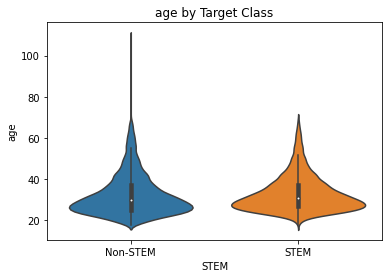

STEM stats:
 count    13237.000000
mean        68.840825
std          3.880171
min          1.000000
25%         66.000000
50%         69.000000
75%         72.000000
max         95.000000
Name: height, dtype: float64 

Non-STEM stats:
 count    38510.000000
mean        68.156037
std          3.998576
min          4.000000
25%         65.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64 



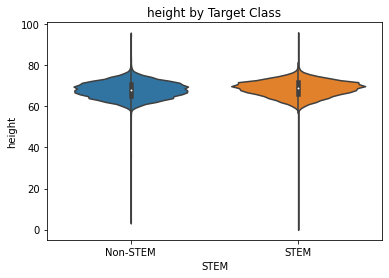

STEM percentages:
 m    70.96
f    29.04
Name: sex, dtype: float64 

Non-STEM percentages:
 m    56.85
f    43.15
Name: sex, dtype: float64


<Figure size 432x288 with 0 Axes>

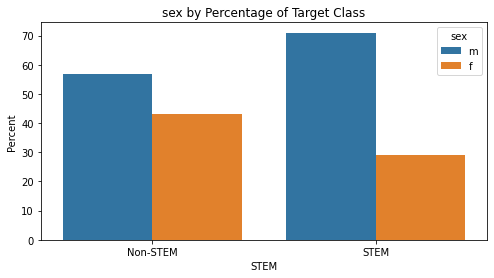

STEM percentages:
 straight    88.86
gay          7.71
bisexual     3.43
Name: orientation, dtype: float64 

Non-STEM percentages:
 straight    85.41
gay          9.69
bisexual     4.89
Name: orientation, dtype: float64


<Figure size 432x288 with 0 Axes>

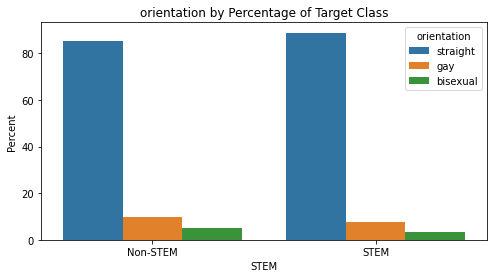

STEM percentages:
 single            91.29
seeing someone     4.17
available          3.90
married            0.63
unknown            0.02
Name: status, dtype: float64 

Non-STEM percentages:
 single            93.35
seeing someone     3.28
available          2.88
married            0.48
unknown            0.02
Name: status, dtype: float64


<Figure size 432x288 with 0 Axes>

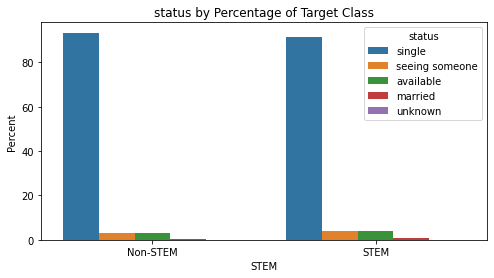

STEM percentages:
 white               58.00
asian               12.26
2 or more            9.90
unknown              7.58
indian               3.35
hispanic / latin     3.32
black                2.12
other                2.11
pacific islander     0.78
middle eastern       0.51
native american      0.07
Name: ethnicity, dtype: float64 

Non-STEM percentages:
 white               55.55
2 or more           12.29
asian                9.47
unknown              7.94
hispanic / latin     5.11
black                3.86
other                3.11
indian               1.32
pacific islander     0.68
middle eastern       0.55
native american      0.13
Name: ethnicity, dtype: float64


<Figure size 432x288 with 0 Axes>

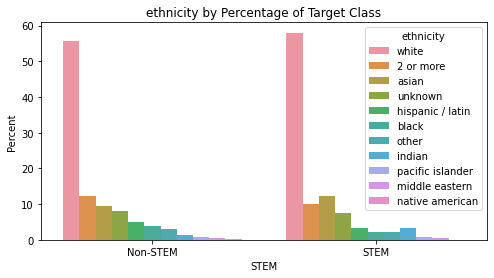

In [26]:
analyze_numerical_by_class('age')
analyze_numerical_by_class('height')  
analyze_category_by_class('sex')
analyze_category_by_class('orientation')
analyze_category_by_class('status')
analyze_category_by_class('ethnicity')

### 2. Spirituality: Religion and sign_mod are likely good predictors  

- religion: STEM users are more likely to be Agnostic (17.81% vs 14.76%),  Atheist (16.85% vs 10.61%) or Hindu (1.34% vs 0.61%). They are less likely to be Christian (8.32% vs 10.95%) or Catholic (7.07% vs 8.94%). Both show very similar rates of Jewish, Buddhist and Islamic users. This could be a good predictor.

- religion_mod: There are similar distributions between religious sentiment for both groups with a right skew for seriousness. This is likely not a good predictor.

- sign_mod: Both show similar patterns of the majority either not filling out an astrological sign or saying it doesn't matter. Next most popular sentiment is that it is fun to think about. Very few people said that it really matters. Even though the overall pattern was similar, STEM users were more likely to either not fill it out or say it doesn't matter (54.35% vs 41.9%). This is likely a good predictor.


STEM percentages:
 unknown         28.42
agnosticism     17.81
atheism         16.85
other           11.14
christianity     8.32
catholicism      7.07
judaism          5.32
buddhism         3.50
hinduism         1.34
islam            0.23
Name: religion, dtype: float64 

Non-STEM percentages:
 unknown         30.05
other           14.95
agnosticism     14.76
christianity    10.95
atheism         10.61
catholicism      8.94
judaism          5.46
buddhism         3.43
hinduism         0.61
islam            0.24
Name: religion, dtype: float64


<Figure size 432x288 with 0 Axes>

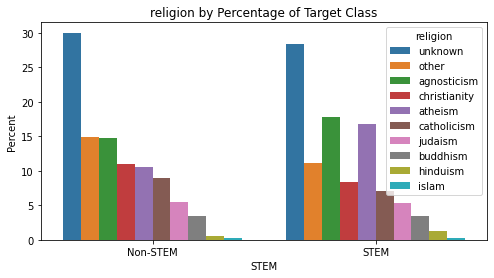

STEM percentages:
 0    45.71
1    22.61
2    20.00
3     8.08
4     3.61
Name: religion_mod, dtype: float64 

Non-STEM percentages:
 0    45.68
1    22.01
2    20.09
3     8.18
4     4.03
Name: religion_mod, dtype: float64


<Figure size 432x288 with 0 Axes>

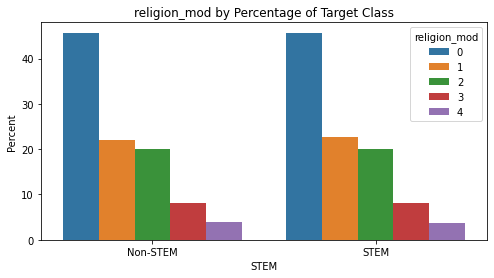

STEM percentages:
 0    54.35
2    28.71
1    16.23
3     0.71
Name: sign_mod, dtype: float64 

Non-STEM percentages:
 0    41.90
2    36.12
1    20.63
3     1.36
Name: sign_mod, dtype: float64


<Figure size 432x288 with 0 Axes>

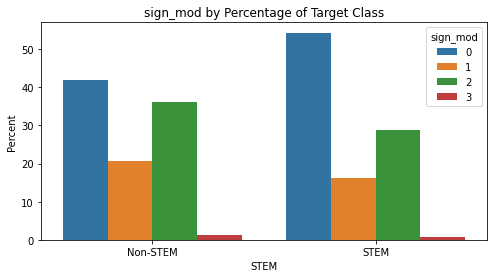

In [27]:
analyze_category_by_class('religion')
analyze_category_by_class('religion_mod')
analyze_category_by_class('sign_mod')

### 3. Substance Use: Smokes may be a good predictor

- drinks: Similar distributions, but STEM users were less likely to describe their drinking as often (7.98% vs 9.02%) or very often (0.51% vs 0.89%). This probably is not enough of a difference to offer much predictive power because these are opinions at the extremes of the bell curve. The vast majority fall under socially for both.

- drugs: Similar distributions with a slightly higher proportion of non-STEM users in the sometimes and often categories (combined 14.76% vs 11.34%). Not enough of a difference to be a good predictor.

- smokes: STEM users are less likely to be a smoker. 19.71% of non-STEM users report some form of smoking vs 12.07% of STEM users. This may be useful as a predictor when converted to an ordinal variable.

STEM percentages:
 socially       72.84
rarely         10.52
often           7.98
not at all      4.87
unknown         2.80
very often      0.51
desperately     0.48
Name: drinks, dtype: float64 

Non-STEM percentages:
 socially       70.41
rarely         10.22
often           9.02
not at all      5.77
unknown         3.14
very often      0.89
desperately     0.55
Name: drinks, dtype: float64


<Figure size 432x288 with 0 Axes>

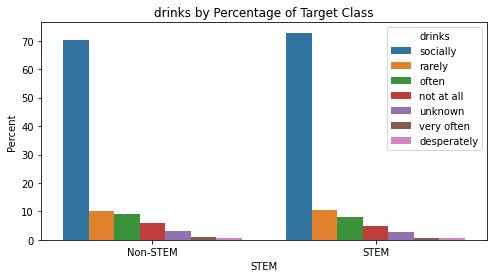

STEM percentages:
 never        65.67
unknown      22.99
sometimes    10.93
often         0.41
Name: drugs, dtype: float64 

Non-STEM percentages:
 never        62.61
unknown      22.63
sometimes    13.95
often         0.81
Name: drugs, dtype: float64


<Figure size 432x288 with 0 Axes>

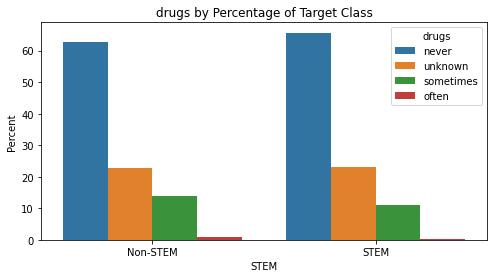

STEM percentages:
 no                81.40
unknown            6.52
sometimes          4.46
when drinking      4.29
trying to quit     1.81
yes                1.51
Name: smokes, dtype: float64 

Non-STEM percentages:
 no                73.14
unknown            7.16
sometimes          6.95
when drinking      5.51
yes                4.44
trying to quit     2.81
Name: smokes, dtype: float64


<Figure size 432x288 with 0 Axes>

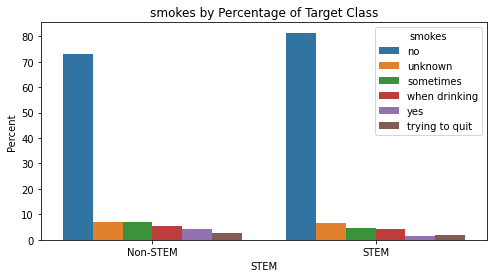

In [28]:
analyze_category_by_class('drinks')
analyze_category_by_class('drugs')
analyze_category_by_class('smokes')

### 4. Diet and Body Type: Not good predictors

- diet: The majority of the population ~87% did not answer or will eat anything. The other categories had similar rates in both target classes. This is not going to be a good predictor.

- diet_modifier: Similar distributions for diet_modifier with all categories falling within 1% of their counterparts.

- body_type: Most categories were similar, falling within 1% of their counterparts. STEM profiles were slightly more likely to describe themselves as fit or athletic (45.47% vs 40.03%). This is not a great predictor, but may offer some information.

- body_image: There was very little difference in body_image distribution. STEM had 2% more in the highest category, but 2% less in the second highest category. All others were nearly the same.


STEM percentages:
 anything      49.76
unknown       37.72
vegetarian     8.36
other          2.93
vegan          0.98
kosher         0.13
halal          0.12
Name: diet, dtype: float64 

Non-STEM percentages:
 anything      48.47
unknown       38.17
vegetarian     8.55
other          3.25
vegan          1.19
kosher         0.23
halal          0.13
Name: diet, dtype: float64


<Figure size 432x288 with 0 Axes>

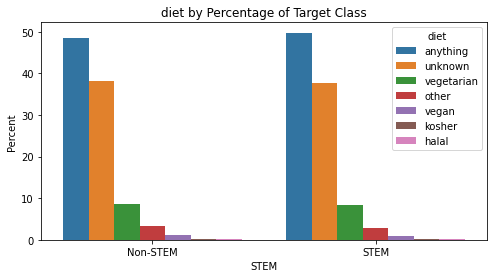

STEM percentages:
 0    49.57
1    37.92
2    12.51
Name: diet_modifier, dtype: float64 

Non-STEM percentages:
 0    50.74
1    38.01
2    11.25
Name: diet_modifier, dtype: float64


<Figure size 432x288 with 0 Axes>

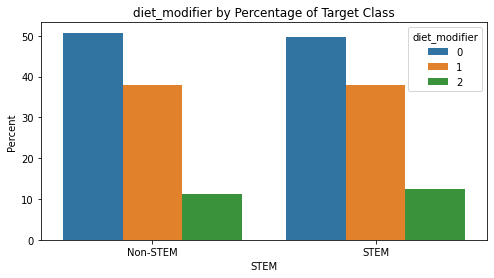

STEM percentages:
 average           25.05
fit               23.91
athletic          21.56
unknown            7.77
thin               7.10
a little extra     4.37
curvy              4.14
skinny             2.72
full figured       1.17
overweight         0.91
jacked             0.59
used up            0.46
rather not say     0.24
Name: body_type, dtype: float64 

Non-STEM percentages:
 average           24.74
fit               20.68
athletic          19.35
thin               8.03
unknown            7.60
curvy              7.55
a little extra     4.72
skinny             2.89
full figured       1.98
overweight         0.76
jacked             0.71
used up            0.64
rather not say     0.35
Name: body_type, dtype: float64


<Figure size 432x288 with 0 Axes>

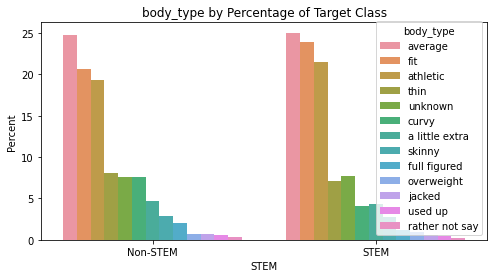

STEM percentages:
 4    50.20
2    33.07
3     8.27
1     7.09
0     1.37
Name: body_image, dtype: float64 

Non-STEM percentages:
 4    48.29
2    32.68
3    10.02
1     7.61
0     1.39
Name: body_image, dtype: float64


<Figure size 432x288 with 0 Axes>

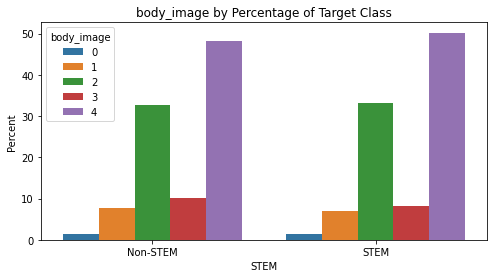

In [29]:
analyze_category_by_class('diet')
analyze_category_by_class('diet_modifier')
analyze_category_by_class('body_type')
analyze_category_by_class('body_image')

### 5. Education: Likely good predictors

- education_level: STEM profiles were more likely to have a Master's degree or higher (31.74% vs 20.34%). Both classes had similar percentages for 4-year college/university graduates. STEM profiles were less likely to have a two-year degree (9.59% vs 18.08%) and much less likely to have only a highschool diploma (1.87% vs 6.34%). There was a very small percentage of each group that did not answer, were highschool dropouts or went to space camp. This is likely a good predictor.

- language_count: STEM profiles were more likely to speak 3 or more languages (28.37% vs 22.38%). This may be because of the inclusion of the C++ and Lisp programming languages as choices. This may be a good predictor and there may be more information to be found in the languages dummy variables. 

STEM percentages:
 4    47.84
5    31.74
3     9.59
0     8.74
2     1.87
1     0.20
Name: education_level, dtype: float64 

Non-STEM percentages:
 4    44.37
5    20.34
3    18.08
0    10.27
2     6.34
1     0.59
Name: education_level, dtype: float64


<Figure size 432x288 with 0 Axes>

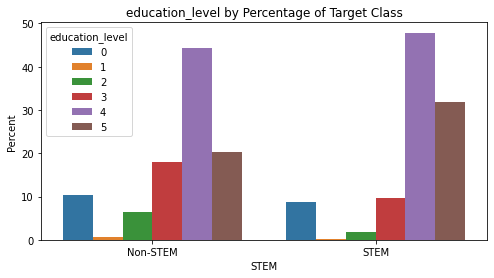

STEM percentages:
 1    42.15
2    29.49
3    17.44
4     7.34
5     3.59
Name: language_count, dtype: float64 

Non-STEM percentages:
 1    47.83
2    29.79
3    14.42
4     5.21
5     2.75
Name: language_count, dtype: float64


<Figure size 432x288 with 0 Axes>

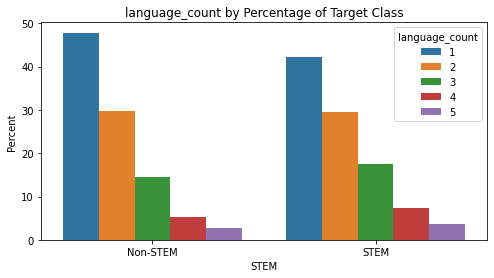

In [30]:
analyze_category_by_class('education_level')
analyze_category_by_class('language_count')

### 6. Children: Not good predictors

- offspring: Most users do not have children, but STEM users are slightly less likely to have children (7.95% vs 9.05%). This likely is not a good predictor.

- more_children: Once again there is little difference between classes with nearly identical proportions in each category. This is likely not a good predictor.

STEM percentages:
 0    92.05
1     4.04
2     3.91
Name: offspring, dtype: float64 

Non-STEM percentages:
 0    90.95
2     4.58
1     4.47
Name: offspring, dtype: float64


<Figure size 432x288 with 0 Axes>

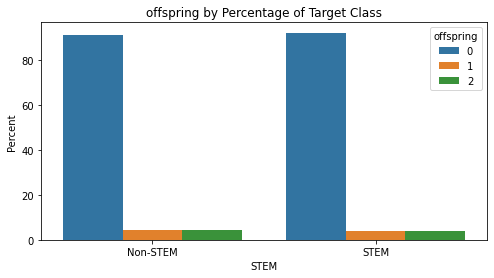

STEM percentages:
 0    85.30
1     7.94
2     6.76
Name: more_children, dtype: float64 

Non-STEM percentages:
 0    84.92
1     8.03
2     7.04
Name: more_children, dtype: float64


<Figure size 432x288 with 0 Axes>

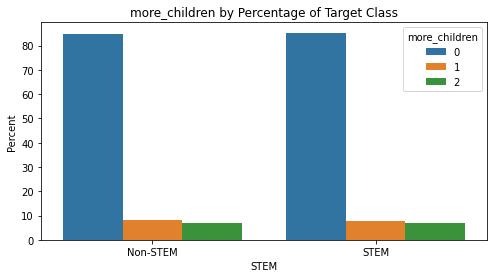

In [31]:
analyze_category_by_class('offspring')
analyze_category_by_class('more_children')

### 7. Pets: Not good predictors

- has_dogs: STEM users are less likely to own a dog (11.49% vs 15.91%).

- likes_dogs: STEM users are also slightly less likely to like dogs (63.19% vs 65.81%).

- has_cats: STEM users are less likely to own a cat (11.49% vs 13.36%).

- likes_cats: Proportions are nearly identical for cat affinity (45.84% vs 45.67%).

STEM percentages:
 0    88.51
1    11.49
Name: has_dogs, dtype: float64 

Non-STEM percentages:
 0    84.09
1    15.91
Name: has_dogs, dtype: float64


<Figure size 432x288 with 0 Axes>

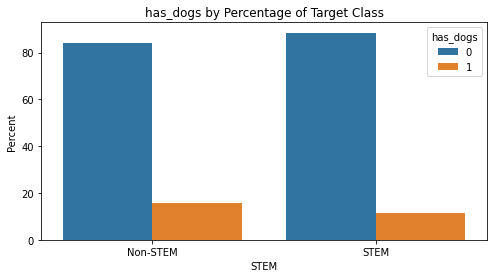

STEM percentages:
 1    63.19
0    36.81
Name: likes_dogs, dtype: float64 

Non-STEM percentages:
 1    65.81
0    34.19
Name: likes_dogs, dtype: float64


<Figure size 432x288 with 0 Axes>

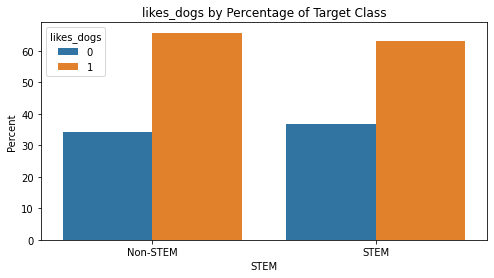

STEM percentages:
 0    88.51
1    11.49
Name: has_cats, dtype: float64 

Non-STEM percentages:
 0    86.64
1    13.36
Name: has_cats, dtype: float64


<Figure size 432x288 with 0 Axes>

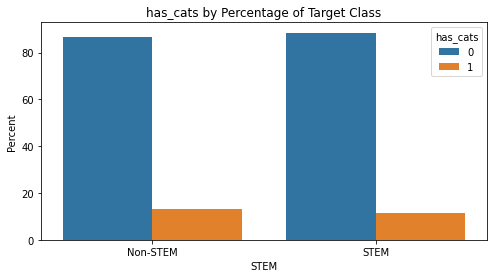

STEM percentages:
 0    54.16
1    45.84
Name: likes_cats, dtype: float64 

Non-STEM percentages:
 0    54.33
1    45.67
Name: likes_cats, dtype: float64


<Figure size 432x288 with 0 Axes>

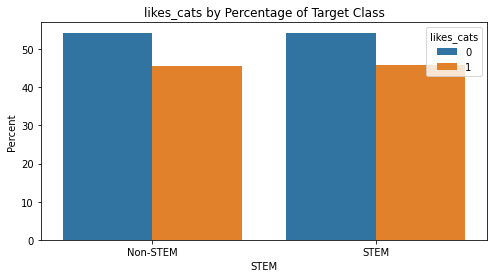

In [32]:
analyze_category_by_class('has_dogs')
analyze_category_by_class('likes_dogs')
analyze_category_by_class('has_cats')
analyze_category_by_class('likes_cats')

## Modeling Plan:

The data will be split into training (0.8) and test set (0.2) portions. The training data will be copied with different subsets of features to compare feature extraction importance by types of features. Using 5-fold cross-validation, trials of aggregating subsets of features will be run through a pipeline for a logistic regression model. The pipeline will consist of a RandomUnderSampler() to randomly downsample the majority class (nonSTEM) until the two target classes are even. Next, will be the StandardScaler() to refit each variable to a standard scale based on that variable's variance.  ROC-AUC scores will be computed for each k-fold and the overall average ROC-AUC score will be compared amongst the trials. This comparison between trials will give a sense for the magnitude of impact each successive feature set has on the baseline model. ROC-AUC is used because it is a good indicator of overall model performance, independent of the threshold used by the logistic regression model for classification. Accuracy is not the best statistic because it would be heavily affected by the threshold. 

Finally, the resultant best model will be scored on the test data to see how training with cross-validation for the model might perform with new samples, including on the actual occurence rate of non-STEM to STEM profiles in the overall population.

**Note:** Not rebalancing the classes and various methods of oversampling the minority class, undersampling the majority class or a combination of over/undersampling were tried. For oversampling, variations of Synthetic Minority Oversampling Technique (SMOTE) were used from the imbalanced-learning (imblearn) library. Based on a comparison of ROC-AUC scores in the test data, random undersampling of the majority class performed the best empirically and was chosen for model fitting. It was also the only method to perform with a ROC-AUC over 0.7 with the test data.

### Prepping Data for Modeling

Candidate Variables Based on Exploratory Data Analysis, subdivided by trial:

**First Trial: (Baseline)**
- age: No prep needed.
- sex: Map to 0 for female, 1 for male.
- religion: Create dummy variables.
- sign_mod: No prep needed.
- smokes: Map to ordinal column.
- education_level: No prep needed.
- language_count: No prep needed.

**Second Trial: (First trial features + Language Fluency)**
- 76 language fluency columns: Create language_list of columns to drop on for trial preparation.

**Third Trial: (1st and 2nd trial features + City Location)**
- 41 city locations: Create dummy variables. Create city_list of columns to drop on for trial preparation.

**Fourth Trial: (Trials 1-3 + Keywords from NLP)**
- 119 binary keyword columns: No prep needed.

In [33]:
# map sex: 'f': 0, 'm':1
profiles.sex = profiles.sex.map({'f': 0, 'm': 1})

# map smokes:
profiles.smokes = profiles.smokes.map({'no': 0,
                                       'unknown': 0,
                                       'sometimes': 1,
                                       'when drinking': 1,
                                       'trying to quit': 2,
                                       'yes': 3})

# drop the unused columns from profiles, store in new variable
profiles_no_extra_columns = profiles.drop(labels=['level_0', 'index',
                                                  'orientation', 'status',
                                                  'ethnicity', 'drinks',
                                                  'drugs', 'body_type',
                                                  'body_image', 'diet',
                                                  'diet_modifier', 'education', 
                                                  'sign', 'location',
                                                  'speaks', 'last_online',
                                                  'has_dogs', 'likes_dogs',
                                                  'has_cats', 'likes_cats',
                                                  'offspring', 'more_children',
                                                  'height', 'religion_mod',
                                                  'essay0', 'essay1', 
                                                  'essay2', 'essay3', 
                                                  'essay4', 'essay5', 
                                                  'essay6', 'essay7', 
                                                  'essay8', 'essay9', 
                                                  'all_essays'
                                                  ], axis=1)

# create dummy variables for religion and city
profiles_clean = pd.get_dummies(profiles_no_extra_columns, prefix=['religion', 'city'])

# create lists for feature subsets to drop on for trials. keywords already exists. Create languages and cities
languages = lang_list + ['sign_language','C_plus_plus']
cities =  ['city_alameda', 'city_albany', 'city_belmont', 'city_benicia', 'city_berkeley', 'city_burlingame',
           'city_castro valley', 'city_daly city', 'city_el cerrito', 'city_el sobrante', 'city_emeryville',
           'city_fairfax', 'city_hayward', 'city_hercules', 'city_lafayette', 'city_martinez', 'city_menlo park',
           'city_mill valley', 'city_millbrae', 'city_mountain view', 'city_novato', 'city_oakland', 'city_other',
           'city_pacifica', 'city_palo alto', 'city_pleasant hill', 'city_redwood city', 'city_richmond',
           'city_san anselmo', 'city_san bruno', 'city_san carlos', 'city_san francisco', 'city_san leandro',
           'city_san lorenzo', 'city_san mateo', 'city_san pablo', 'city_san rafael', 'city_sausalito',
           'city_south san francisco', 'city_stanford', 'city_vallejo', 'city_walnut creek']

f


### Modeling
1. Split data into training and test sets.
2. From X_train and X_test, drop 'keywords' columns. Store in X_train3 and X_test3.
3. From X_train3 and X_test3, drop 'cities' columns. Store in X_train2 and X_test2.
4. From X_train2 and X_test2, drop 'languages' columns. Store in X_train1 and X_test1.
5. Create pipeline from RandomUnderSampler(), StandardScaler(), and LogisticRegression().
6. Split training sets into 5 k-folds for cross validation.
7. Evaluate each trials training data based on ROC-AUC.
8. Fit on best trial model and run associated test data.
9. Evaluate final model performance.

In [34]:
# import tools for modeling
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_recall_fscore_support

# split into X data and y labels
X = profiles_clean.drop(labels= ['STEM'], axis=1)
y = profiles_clean['STEM']


In [35]:
# train test split. X_train and X_test will be used for Trial 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use X_train and X_test to get just the features for trial 3
X_train3 = X_train.drop(columns=keywords)
X_test3 = X_test.drop(columns=keywords)

# use X_train and X_test to get just the features for trial 2
X_train2 = X_train3.drop(columns=cities)
X_test2 = X_test3.drop(columns=cities)

# use X_train and X_test to get just the features for trial 1
X_train1 = X_train2.drop(columns=languages)
X_test1 = X_test2.drop(columns=languages)

In [36]:
# create LogisticRegression model pipeline. random_state set to keep consistency between trials. 
# Max_iter increased to allow more time for model convergence on the large data set.
pipeline = Pipeline([('under', RandomUnderSampler(random_state=42)),
                     ('scaler', StandardScaler()),
                     ('logit', LogisticRegression(max_iter=10000))])

# create 5 k-folds for cross-validation. random_state set to keep consistency between trials.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state= 1)

# run pipeline for Trial 1
cv_results1 = cross_val_score(pipeline,
                              X_train1,
                              y_train,
                              cv= skf,
                              scoring = 'roc_auc')
print(cv_results1, np.mean(cv_results1))

# run pipeline for Trial 2
cv_results2 = cross_val_score(pipeline,
                              X_train2,
                              y_train,
                              cv= skf,
                              scoring = 'roc_auc')
print(cv_results2, np.mean(cv_results2))

# run pipeline for Trial 3
cv_results3 = cross_val_score(pipeline,
                              X_train3,
                              y_train,
                              cv= skf,
                              scoring = 'roc_auc')
print(cv_results3, np.mean(cv_results3))

# run pipeline for Trial 4
cv_results4 = cross_val_score(pipeline,
                              X_train,
                              y_train,
                              cv= skf,
                              scoring = 'roc_auc')
print(cv_results4, np.mean(cv_results4))


[0.65416858 0.64394826 0.65609317 0.63753006 0.64219453] 0.6467869189266781
[0.66753031 0.65750171 0.67270822 0.65533209 0.66238755] 0.6630919762585243
[0.66606498 0.66022994 0.68269012 0.65979128 0.66802111] 0.6673594843620585
[0.76031212 0.76900924 0.77815093 0.75464246 0.76994366] 0.7664116843461519


In [37]:
# fit pipeline on best trial, Trial 4 data
predictions = pipeline.fit(X_train, y_train)
# run logit on test data
predictions = pipeline.predict(X_test)
print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(precision_recall_fscore_support(y_test, predictions))

0.7060418489639609
[[6027 1689]
 [ 972 1662]]
0.7428985507246377
(array([0.86112302, 0.49597135]), array([0.7811042, 0.6309795]), array([0.81916412, 0.55538847]), array([7716, 2634], dtype=int64))


## Results: 

**Trial 1:**
- ROC-AUC Cross Validation = 0.65546156, 0.64562989, 0.65473433, 0.63543622, 0.64191477
- ROC-AUC Average = 0.6466353507211386

**Trial 2:** 
- ROC-AUC Cross Validation = 0.66731827, 0.65895028, 0.67019881, 0.65306156, 0.65941579 
- ROC-AUC Average = 0.6617889419540262

**Trial 3:** 
- ROC-AUC Cross Validation = 0.66601526, 0.66304628, 0.68204223, 0.65556055, 0.66420524
- ROC-AUC Average = 0.6661739110006382

**Trial 4:** 
- ROC-AUC Cross Validation = 0.7590591,  0.76913999, 0.77760996, 0.75448331, 0.76461276
- ROC-AUC Average = 0.764981026622368

**Test Data:** 

- ROC-AUC = 0.7062964747393519
- Accuracy = 0.7430917874396136
- Confusion Matrix = 
                        
                            PREDICTED
                         nonSTEM  STEM 
       ACTUAL    nonSTEM    6028  1688
                 STEM        971  1663




- STEM precision = 0.49597135
- STEM recall = 0.6309795
- STEM F1 = 0.55538847
- Test data num_STEM (support) = 2634

- nonSTEM precision = 0.86112302
- nonSTEM recall = 0.7811042
- nonSTEM F1 = 0.81916412
- Test data num_nonSTEM (support) = 7716

## Interpretation:

Overall, Trials 1-3 did not perform well with respect to the ROC-AUC score. In general, ROC-AUC scores of 0.7-0.8 are considered acceptable. For context, a score of 0.5 is indicative of random guessing for equally distributed classes and a score of 1 is a perfect model. Since the classes were rebalanced to be equal for model development, Trials 1-3 only performed marginally better than random guessing. The significant improvement in model performance after adding the keyword features indicates the value of information that can be derived from free-text sources. Although the computational resources are somewhat higher when dealing with NLP methods, these features were the difference between a poorly performing model and one that can offer some predictive value. 

Looking at the test data confusion matrix and by class statistics, this model does not necessarily predict STEM profiles well, but performs well in predicting non-STEM profiles. Overall, the errors are most likely due to the amount of missing information in the original data and the fact that the test data classes were not rebalanced. For example, the model derives a significant amount of its prediction from the free text data, and over 9% of the population sample did not fill out any of the essays. As such, when computing probability of class, the model has limited information and was more often correct in the test data when assigning non-STEM due to a class imbalance in the population. A random guess between classes is more likely to be correct if it is non-STEM because the population occurrence of non-STEM profiles is roughly 3:1. The frequency of error types could be adjusted by lowering or raising the threshold of prediction for STEM profiles. Normally this would be done with the use of a profit-matrix where a different penalty (increased risk or financial cost) is assigned to the two types of error, false-positives and false-negatives. Based on the cost of each type of error, the decision threshold would be adjusted to shift the balance of the errors towards the less costly type.

## Conclusion:

This was a good exercise in feature extraction, natural language processing and strategies for dealing with imbalanced target classes. The model could most likely be improved by systematically eliminating poor performing features that only add noise to the classification model. One way to do this would be by looking at the absolute value of the coefficients for each of the features in the logistic regression formula. Those that are closest to 0 would be removed until removing any more does not improve model predictions or significantly impacts performance. In practice, models with similar performance but fewer features are preferred because they take less time to process and require the gathering of fewer data points. Another way to improve model performance would be to lower cutoff levels for keyword selection. This would increase the number of keywords and maximize the information derived from the essay columns. The trade-off would be more processing time for a diminishing increase in model performance. Due to the amount of missing information, the ceiling for model performance will be in the neighborhood of 0.9 because there is not enough variation in the non-text columns to reliably predict the class without the addition of keyword data. Additionally, other classification models could be explored including K-nearest Neighbor, Random Forest, Naive-Bayes and Neural Network models.
